[Indice](index.ipynb) | Previo: [Problema3Cuerpos.Aplicaciones.RadioHill](08.06.01.00.Problema3Cuerpos.Aplicaciones.RadioHill.ipynb) | Siguiente: [Problema3Cuerpos.Aplicaciones.ParametroTisserand](08.06.03.00.Problema3Cuerpos.Aplicaciones.ParametroTisserand.ipynb)

### 8.13.7. Órbitas periódicas cerca a los puntos de equilibrio
<a id='crtbp_orbitas_puntosequilibrio'></a>

Una de las más importantes aplicaciones del CRTBP es el estudio de las órbitas que cuerpos pequeño o vehículos espaciales pueden realizar *cerca* a los puntos de equilibrio de Lagrange.  El tratamiento exhaustivo de este problema va más allá del nivel de este libro, pero es inevitable que mencionemos aquí esta importante aplicación del CRTBP, especialmente por su valor decisivo en la exploración espacial presente y futura.  Una síntesis moderna del problema (especialmente de sus ramificaciones en la exploración espacial) puede encontrarse en <cite data-cite="Grebow2006"><a href="mybook.html#Grebow2006">Grebow (2006)</a></cite> o en <cite data-cite="Barrabes2005"><a href="mybook.html#Barrabes2005">Barrabes (2005)</a></cite> y en las referencias contenidas en estos trabajos.

Por definición una partícula se deja en reposo en un punto de equilibrio en el CRTBP debería permanecer allí para siempre.  Pero ¿qué pasa si el cuerpo no está exactamente en el punto de equilibrio en reposo sino muy cerca de él o con una pequeña velocidad?  

Comencemos por considerar un caso de gran interés en astronomía y es el de los cuerpos astronómicos que están cerca de los puntos de equilibrio triangulares $L_4$ y $L_5$.  Para hacerlo calculemos primero la ubicación de estos puntos.  Esta puede obtenerse teniendo en cuenta que forman con los cuerpos masivos sendos triángulos equilateros de lado $a=1$:

\begin{eqnarray}
x_{L4}=x_{L5} & = & \frac{1}{2} - \alpha\\
y_{L4}=-y_{L5} & = & \frac{\sqrt{3}}{2}\\
\end{eqnarray}
donde hemos usado $\cos 60^\circ=1/2$ y $\sin 60^\circ=\sqrt{3}/2$.

Resolvamos ahora la ecuación de movimiento para una partícula de prueba que se encuentra no sobre el punto $L_4$ sino muy cerca a él.  Como repetiremos este misma algoritmos en varias oportunidades en esta sección, implementaremos este procedimiento como una rutina:

In [1]:
%matplotlib nbagg

<a id='code:orbitas_crtbp'></a>

In [2]:
def orbitas_crtbp(alfa,ro,vo,
                  T=100,Nt=1000,
                  xlim=(-1.5,1.5),ylim=(-1.5,1.5),
                  xL=0,yL=0,
                 ):
    #Tiempos de integración
    from numpy import linspace
    ts=linspace(0,T,Nt)
    #Solución numérica a la ecuación de movimiento
    from pymcel.export import crtbp_solucion
    solucion=crtbp_solucion(alfa,ro,vo,ts)
    #Posiciones y velocidades en el sistema rotante
    rs=solucion[0]
    vs=solucion[1]
    #Gráfico
    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=(5,5))
    ax=fig.gca()
    ax.plot(rs[:,0],rs[:,1],'k-')
    ax.plot([-alfa],[0],'ro',ms=10)
    ax.plot([1-alfa],[0],'bo',ms=5)
    #Punto de Lagrange
    ax.plot([xL],[yL],'r+',ms=10)
    #Decoración
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.grid()
    return fig

Las condiciones iniciales y la trayectoria pueden obtenerse invocando la rutina recien diseñada:

<a id='code:crtbp_orbita1_L4'></a>

<IPython.core.display.Javascript object>


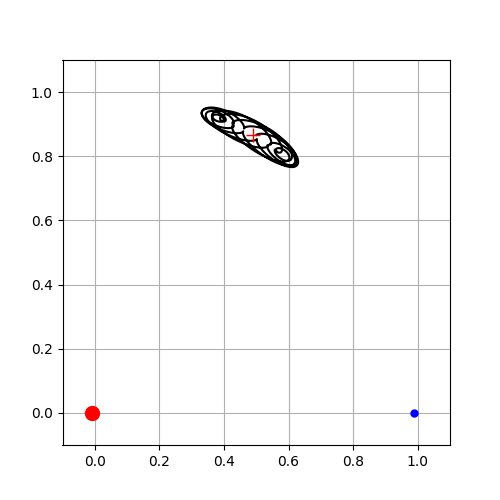

In [3]:
#Propiedades del sistema
alfa=0.01
xL4=0.5-alfa
yL4=3**0.5/2
#Condiciones
ro=[xL4+0.01,yL4,0.0]
vo=[0.0,0.0,0.0]
#Órbita
fig=orbitas_crtbp(alfa,ro,vo,
              xlim=(-0.1,1.1),ylim=(-0.1,1.1),
              xL=xL4,yL=yL4)

<a id='code:crtbp_orbita1_L4'></a><center><b>Figura 8.124.</b> </center>

Como vemos en la Figura ([code:crtbp_orbita1_L4](#fig:code:crtbp_orbita1_L4)), cerca a $L_4$ una partícula con una velocidad inicial muy pequeña, se mantendrá no muy lejos del punto de equilibrio, describiendo una órbita con una estructura peculiar (y posiblemente estable) alrededor de él.  En el sistema de referencia inercial, una trayectoria como esta se traduce en que la partícula describirá en el espacio una órbita alrededor del cuerpo más masivo (el Sol por ejemplo), casi idéntica a la órbita del segundo cuerpo (un planeta por ejemplo), manteniéndose, sin embargo, 60 grados más adelante que este último.  A este tipo de configuración la llamamos en general **trayectoria coorbital** y ha sido observada en el Sistema Solar, en al menos dos familias de asteroides conocidos como los Troyanos y los Griegos, que coorbitan con el planeta Júpiter.  La existencia de *Troyanos* (que ha terminado por convertirse en un término genérico para denotar este tipo de configuraciones coorbitales) ha sido demostrada o postulada para otros planetas del Sistema Solar, incluyendo la Tierra e incluso para satélites como la Luna.

Es posible aprovechar las propiedades de los puntos triangulares para buscar trayectorias períodicas y estables alrededor de ellos que puedan ser aprovechadas, por ejemplo, para estacionar vehículos espaciales coorbitales, que se mantenga a una distancia razonable de un planeta o una Luna, mientras orbitan el cuerpo central.  En el algoritmo a continuación se muestra una de esas trayectorias, tal y como fue encontrada por <cite data-cite="Grebow2006"><a href="mybook.html#Grebow2006">Grebow (2006)</a></cite> (ver Tabla 3.14 en ese trabajo):

<a id='code:crtbp_orbita2_L4'></a>

<IPython.core.display.Javascript object>


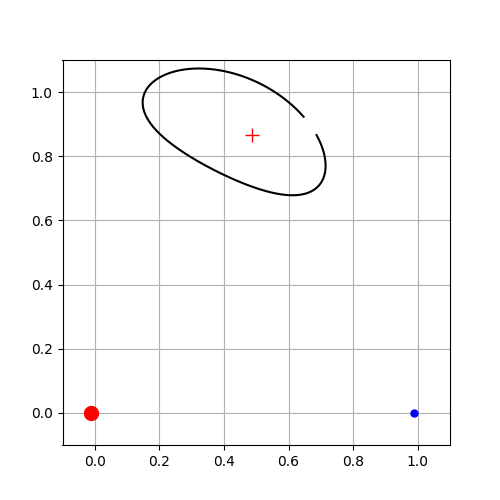

In [4]:
#Propiedades del sistema
alfa=0.0121505856
xL4=0.5-alfa
yL4=3**0.5/2
#Condiciones iniciales
ro=[0.6867,yL4,0]
vo=[0.1126,-0.2040,0]
from numpy import pi
fig=orbitas_crtbp(alfa,ro,vo,
              T=2*pi,Nt=1000,
              xlim=(-0.1,1.1),ylim=(-0.1,1.1),
              xL=xL4,yL=yL4)

<a id='code:crtbp_orbita2_L4'></a><center><b>Figura 8.125.</b> </center>

Las específicas condiciones iniciales usadas en este algoritmo fueron buscadas y encontradas mediante métodos numéricos específicamente diseñados con ese propósito.  Como vemos en la Figura ([code:crtbp_orbita2_L4](#fig:code:crtbp_orbita2_L4)) a diferencia de la trayectoria relativamente desordenada que habíamos visto antes, la partícula describe una *predecible* y periódica órbita alrededor de $L_4$, que tiene un período casi igual al período de traslación de la partícula menos masiva alrededor del cuerpo central (en unidades canónicas del CRTBP es $P=2\pi/\omega=2\pi$).  En este caso específico, el valor de $\alpha$ corresponde al sistema Tierra-Luna. 

¿Se pueden encontrar trayectorias similares alrededor de los demás puntos de equilibrio? Una familia muy interesante de trayectorias, se encuentra considerando condiciones iniciales cercanas al punto $L_3$.  Considere por ejemplo el siguiente ejemplo:

<a id='code:crtbp_orbita_L3'></a>

<IPython.core.display.Javascript object>


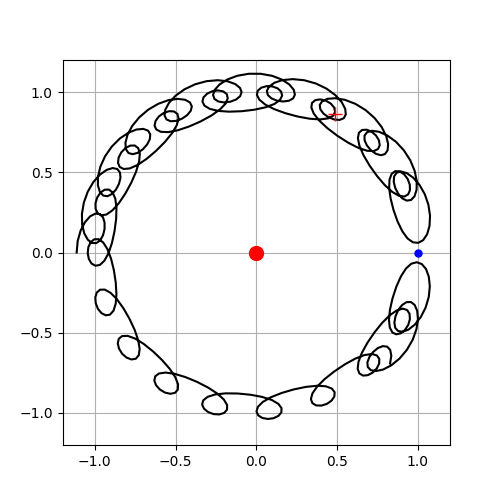

In [5]:
#Propiedades del sistema
alfa=1e-4
from scipy.optimize import bisect
from pymcel import funcion_puntos_colineales
xL3=bisect(funcion_puntos_colineales,-2,-0.5,args=(alfa,))
#Condiciones iniciales
ro=[-1.112349859300,0,0]
vo=[0,+0.202041957868,0]
fig=orbitas_crtbp(alfa,ro,vo,
              T=180,Nt=500,
              xlim=(-1.2,1.2),ylim=(-1.2,1.2),
              xL=xL4,yL=yL4)

<a id='code:crtbp_orbita_L3'></a><center><b>Figura 8.126.</b> </center>

Nótese la forma peculiar de la trayectoria de la partícula de prueba en el sistema rotante: una enorme U con rizos alrededor de la que sería la órbita de la partícula menos masiva.  En los extremos de la U la partícula de prueba nunca llega a quedar en órbita alrededor del cuerpo secundario. A este tipo de trayectorias se las conoce, convenientemente como **orbitas en herradura** (*horseshoe orbits* en inglés).

En el sistema solar hemos encontrado cuerpos que describen trayectorias como estas.  Así por ejemplo, el asteroide cercano a la Tierra [2002 AA29](https://en.wikipedia.org/wiki/2002_AA29) tiene una órbita de herradura que se superpone a la órbita terrestre y en la que tarda casi 1 siglo para completar un recorrido en rizos tresdimensionales similares a los que vimos en el plano para el sistema mostrado en la Figura ([code:crtbp_orbita_L3](#fig:code:crtbp_orbita_L3)).  En una situación similar se encuentra el asteroide [3753 Cruithne](https://en.wikipedia.org/wiki/3753_Cruithne) y otro puñado de asteroides cercanos a la Tierra.  En una situación dinámica similar se encuentran dos satélites coorbitales de Saturno [1980S1](https://www.jpl.nasa.gov/spaceimages/details.php?id=PIA02284) y 1980S2 descubiertos por la nave Voyager 1 en la década de los ochentas.

El caso de órbitas periódicas estables alrededor de los puntos de equilibrio $L_1$ y $L_2$ es posiblemente el que más atención este recibiendo en el presente en el área de la exploración espacial y del cuál la humanidad ya se ha valido en aplicaciones espaciales concretas.  En este caso, las órbitas más interesantes ocurren en el espacio de tres dimensiones. Para representar gráficamente estas órbitas necesitaremos una rutina analoga a `orbitas_crtbp`:

<a id='code:orbitas_crtbp3d'></a>

In [6]:
def orbitas_crtbp3d(alfa,ro,vo,
                  T=100,Nt=1000,
                  xlim=(-1.5,1.5),ylim=(-1.5,1.5),zlim=(-1.5,1.5),
                  xL=0,yL=0,zL=0,
                  elevation=10,azimuth=-80
                 ):
    #Tiempos de integración
    from numpy import linspace
    ts=linspace(0,T,Nt)
    #Solución numérica a la ecuación de movimiento
    from pymcel.export import crtbp_solucion
    solucion=crtbp_solucion(alfa,ro,vo,ts)
    #Posiciones y velocidades en el sistema rotante
    rs=solucion[0]
    vs=solucion[1]
    #Gráfico
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fig=plt.figure(figsize=(5,5))
    ax=fig.gca(projection='3d')
    ax.plot(rs[:,0],rs[:,1],rs[:,2],'k-')
    ax.plot([-alfa],[0],[0],'ro',ms=10)
    ax.plot([1-alfa],[0],[0],'bo',ms=5)
    ax.plot([xL],[yL],[zL],'r+',ms=10)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_zlim(zlim)
    ax.view_init(elevation,azimuth)
    fig.tight_layout()
    return fig

Un ejemplo de una trayectoria periódica relacionada con el punto $L_1$ se demuestra en este sistema:

<a id='code:crtbp_orbita_L1'></a>

<IPython.core.display.Javascript object>


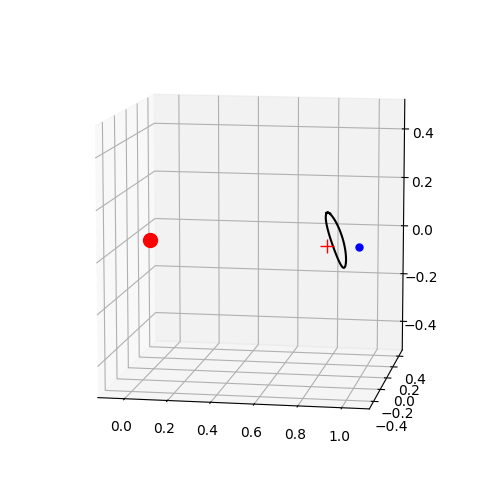

In [7]:
#Propiedades del sistema
alfa=0.0121505856
xL1=bisect(funcion_puntos_colineales,0,1-2*alfa,args=(alfa,))
#Condiciones iniciales
ro=[0.8329,0,0.1304]
vo=[0,0.2437,0]
fig=orbitas_crtbp3d(alfa,ro,vo,
                T=3,Nt=100,
                xlim=(-0.1,1.1),ylim=(-0.5,0.5),zlim=(-0.5,0.5),
                xL=xL1,yL=0,zL=0
               )

<a id='code:crtbp_orbita_L1'></a><center><b>Figura 8.127.</b> </center>

Una órbita como está, permite por ejemplo estacionar en un vehículo espacial en una trayectoria desde la que puede ver el Sol permanentemente y sin obstrucciones, sin alejarse mucho e la Tierra a donde debe enviar periódicamente imágenes y datos de su estado.  Este tipo de trayectoria es la que se uso, preciamente para estacionar el telescopio [SOHO](https://en.wikipedia.org/wiki/Solar_and_Heliospheric_Observatory) de NASA.  A este tipo de trayectorias se las conoce como **órbitas halo**.

Una órbita halo alrededor el punto de Lagrange $L_2$ se muestra a continuación:

<a id='code:crtbp_orbita_L2'></a>

<IPython.core.display.Javascript object>


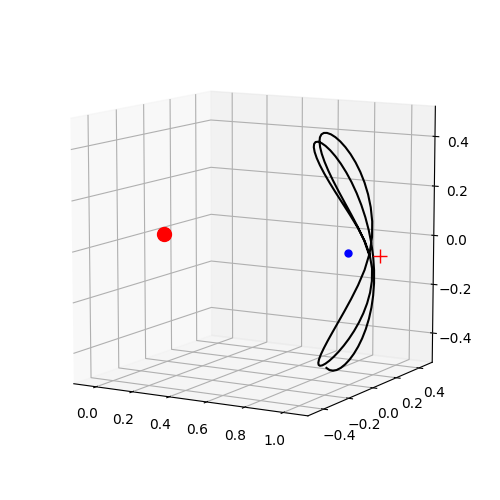

In [8]:
#Propiedades del sistema
alfa=0.0121505856
xL2=bisect(funcion_puntos_colineales,1-0.5*alfa,2,args=(alfa,))
#Condiciones iniciales
ro=[1.1003,0,0]
vo=[0,-0.3217,0.5973]
fig=orbitas_crtbp3d(alfa,ro,vo,
                T=10,Nt=100,
                xlim=(-0.1,1.1),ylim=(-0.5,0.5),zlim=(-0.5,0.5),
                xL=xL2,yL=0,zL=0,
                elevation=10,azimuth=-60
               )

<a id='code:crtbp_orbita_L2'></a><center><b>Figura 8.128.</b> </center>

Una órbita de este tipo fue usada recientemente usada por la [misión lunar China *Chang'e 4*](https://en.wikipedia.org/wiki/Chang%27e_4), en especial por el satélite de relevo *Queqiao* que fue estacionado en una órbita halo alrededor del punto $L_2$ del sistema Tierra-Luna en Junio 14 de 2018.  La razón era simple.  La misión incluía un vehículo de que descendio en el lado lejano de la Luna (que no es visible y con el que no se puede tener contacto radial desde la Tierra).  Al estar en una órbita tres dimensional alrededor de $L_2$ y desde la que se puede ver el lado lejano de la Luna (ver Figura ([code:crtbp_orbita_L2](#fig:code:crtbp_orbita_L2))), el *Queqiao* podía recibir la señal del vehículo de descenso y retransmitirla a la Tierra.  Un uso muy ingenioso de la mecánica celeste.

Busque las figuras interactivas y las animaciones incluídas en el [sitio en línea del libro](http://mybook.org).

En la animación a continuación el lector puede visualizar algunas de las órbitas en el CRTBP que presentamos en esta sección, tanto en el sistema rotante como en el sistema inercial.  Para hacerlo, elija primero el conjunto de condiciones iniciales que quiere simular:

In [24]:
#orbita="L4_arbitraria"
#orbita="L4_periodica"
orbita="L3"
#orbita="L2"
#orbita="L1"

if orbita=="L4_arbitraria":
    #Órbita arbitraria alrededor de L4
    alfa=0.01
    ro=[0.5-alfa+0.01,3**0.5/2,0.0]
    vo=[0.0,0.0,0.0]
    T=100
    Nt=1000
elif orbita=="L4_periodica":
    #Órbita periódica alrededor de L4
    alfa=0.0121505856
    ro=[0.6867,3**0.5/2,0]
    vo=[0.1126,-0.2040,0]
    T=2*pi
    Nt=1000
elif orbita=="L3":
    #Órbita de herradura comenzando cerca a L3
    alfa=1e-4
    ro=[-1.112349859300,0,0]
    vo=[0,+0.202041957868,0]
    #T=180
    #Nt=500
    T=100
    Nt=500
elif orbita=="L1":
    #Órbita halo cerca a L1
    alfa=0.0121505856
    ro=[0.8329,0,0.1304]
    vo=[0,0.2437,0]
    T=3
    Nt=100
elif orbita=="L2":
    #Órbita halo cerca a L2
    alfa=0.0121505856
    ro=[1.1003,0,0]
    vo=[0,-0.3217,0.5973]
    T=10
    Nt=100
    
#Tiempos y solucion
from numpy import linspace
ts=linspace(0,T,Nt)
from pymcel.export import crtbp_solucion
rs_rot,vs_rot,rs_ine,vs_ine,r1_ine,r2_ine=crtbp_solucion(alfa,ro,vo,ts)

El código fuente de la animación es el siguiente:

<IPython.core.display.Javascript object>


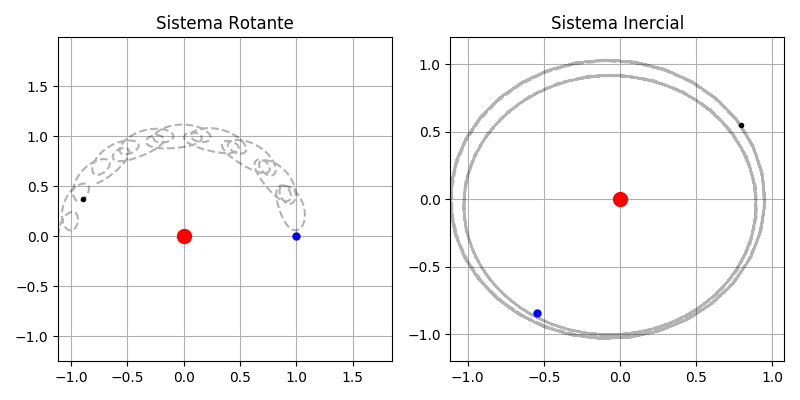

In [25]:
#Prepara figura
import matplotlib.pyplot as plt
fig,axs=plt.subplots(1,2,figsize=(8,4))

punto_rot,=axs[0].plot([],[],'k.')
linea_rot,=axs[0].plot(rs_rot[:,0],rs_rot[:,1],'k--',alpha=0.3)
axs[0].plot([-alfa],[0],'ro',ms=10)
axs[0].plot([1-alfa],[0],'bo',ms=5)
axs[0].set_title("Sistema Rotante")
axs[0].grid()
from pymcel.plot import fija_ejes_proporcionales
fija_ejes_proporcionales(axs[0],(rs_rot[:,:2],[-alfa,1-alfa]));

punto_ine,=axs[1].plot([],[],'k.')
linea_ine,=axs[1].plot(rs_ine[:,0],rs_ine[:,1],'k--',alpha=0.3)
punto1_ine,=axs[1].plot([],[],'ro',ms=10)
punto2_ine,=axs[1].plot([],[],'bo',ms=5)
axs[1].set_title("Sistema Inercial")
axs[1].grid()
fija_ejes_proporcionales(axs[1],(rs_ine[:,:2],r1_ine,r2_ine),ycm=0);
fig.tight_layout()

#Rutina de animación
def animacion(it):
    punto_rot.set_data(rs_rot[it,0],rs_rot[it,1])
    punto_ine.set_data(rs_ine[it,0],rs_ine[it,1])
    punto1_ine.set_data(r1_ine[it,0],r1_ine[it,1])
    punto2_ine.set_data(r2_ine[it,0],r2_ine[it,1])
    return punto_rot,punto_rot,punto1_ine,punto2_ine
    
#Animación
from matplotlib import animation
anim=animation.FuncAnimation(fig,animacion,frames=Nt,interval=50,blit=True,repeat=False);

Si desea tener más control sobre la animación puede visualizarla usando el siguiente comando:

In [23]:
from IPython.display import HTML
HTML(anim.to_jshtml())

KeyboardInterrupt: 

[Indice](index.ipynb) | Previo: [Problema3Cuerpos.Aplicaciones.RadioHill](08.06.01.00.Problema3Cuerpos.Aplicaciones.RadioHill.ipynb) | Siguiente: [Problema3Cuerpos.Aplicaciones.ParametroTisserand](08.06.03.00.Problema3Cuerpos.Aplicaciones.ParametroTisserand.ipynb)